In [11]:
from left_turn_pedestrian.controller import sys_ctrl
import pickle
import hard_tests
import random
import visualization.animate as animate

import tulip as tlp
from tulip import transys, abstract, spec, synth
from IPython.display import HTML

import networkx as nx
import scipy
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

In [2]:
# Load the graph from the saved file
with open('left_turn_pedestrian/' + 'graph', "rb") as file:
    G = pickle.load(file)

In [3]:
G

In [4]:
def k_means_clust(G, k):
    '''
    Input: 
        - G: networkx MultiDiGraph
        - k: number of clusters
    Return:
        - labels of each node's cluster
        - number of nodes in each cluster
    '''

    # Convert the MultiDiGraph to an adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(adj_matrix)

    # Get the cluster labels
    labels = kmeans.labels_

    # Visualize the results
    pos = nx.spring_layout(G)  # positions for all nodes

    plt.figure(figsize=(8, 6))

    colors = [(np.random.uniform(),np.random.uniform(),np.random.uniform(), 0.5) for i in range(max(labels)+1)]

    # Draw the nodes with colors based on their cluster
    num_in_clust = [0] * k
    for i in range(k):
        nodes = [n for n in G.nodes if labels[n] == i]
        num_in_clust[i] = len(nodes)
        # nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=plt.cm.tab10(i), label=f'Cluster {i}')
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[i], label=f'Cluster {i}')

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrows=True)

    # plt.legend()
    plt.title(f'K-means Clustering of Left Turn Pedestrian with {k} Clusters')
    plt.show()

    return labels, num_in_clust

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


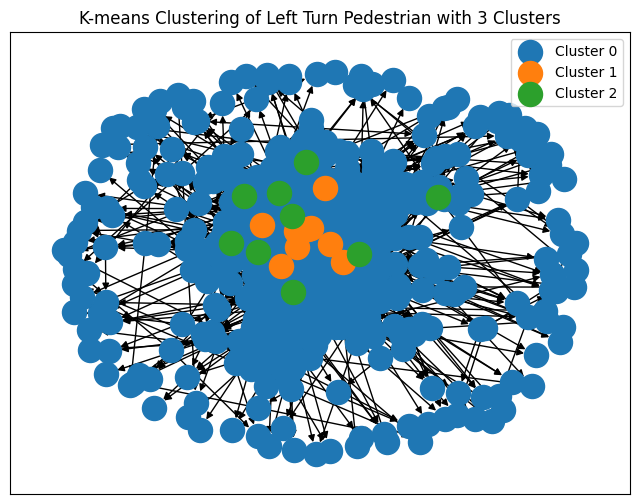

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figur

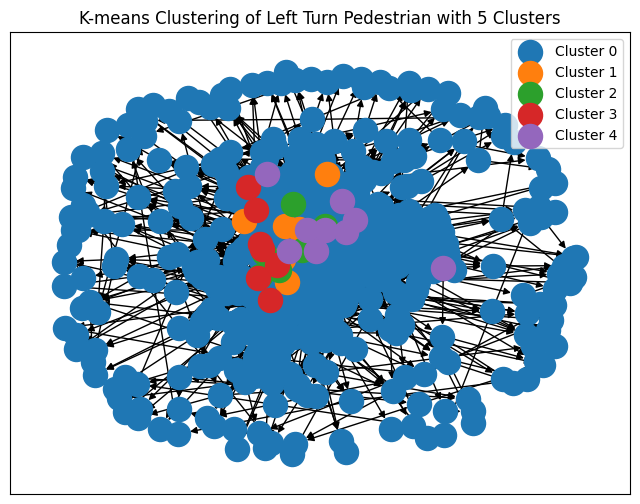

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figur

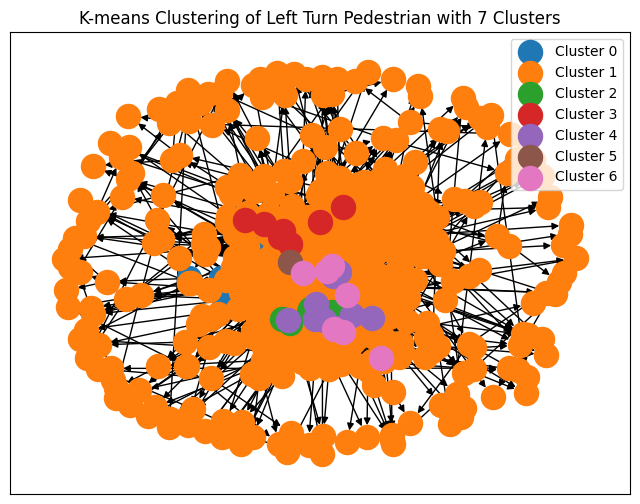

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figur

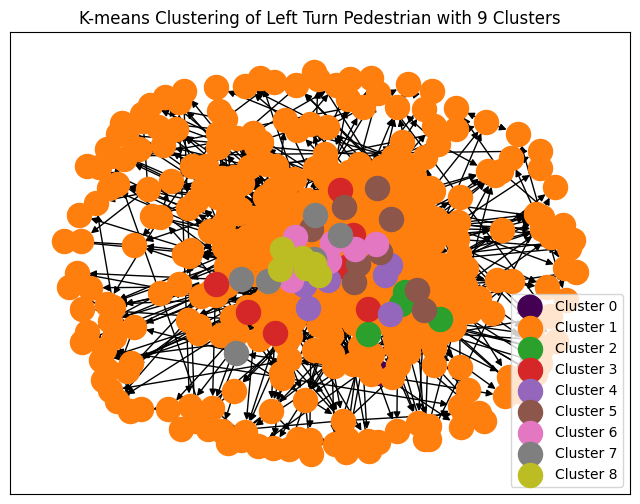

In [5]:
kmeans_labels = []
kmeans_num_in_clusts = []
for k in range(3, 10, 2):
    lab, num = k_means_clust(G, k)
    kmeans_labels.append(lab)
    kmeans_num_in_clusts.append(num)

In [6]:
def affin_prop_clust(G):
    # Convert the MultiDiGraph to an adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()

    # Convert the adjacency matrix to a similarity matrix
    # Here, we use negative of adjacency matrix as similarity matrix, you can use any similarity measure as needed
    adj_matrix = adj_matrix.astype(np.float64)
    similarity_matrix = -adj_matrix

    # Perform Affinity Propagation clustering
    # affinity_propagation = AffinityPropagation(affinity='precomputed', random_state=42)
    affinity_propagation = AffinityPropagation()
    affinity_propagation.fit(similarity_matrix)

    # Get the cluster labels
    labels = affinity_propagation.labels_

    # Visualize the results
    pos = nx.spring_layout(G)  # positions for all nodes

    plt.figure()

    # Use a colormap that supports many unique colors
    colors = [(np.random.uniform(),np.random.uniform(),np.random.uniform(), 0.5) for i in range(max(labels)+1)]

    # Draw the nodes with colors based on their cluster
    unique_labels = np.unique(labels)
    num_in_clust = []
    for label in unique_labels:
        nodes = [n for n in G.nodes if labels[n] == label]
        num_in_clust.append(len(nodes))
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[label], label=f'Cluster {label}')

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrows=True)

    # plt.legend()
    plt.title('Affinity Propagation Clustering of Left Turn Pedestrian')
    plt.show()
    
    return labels, num_in_clust

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


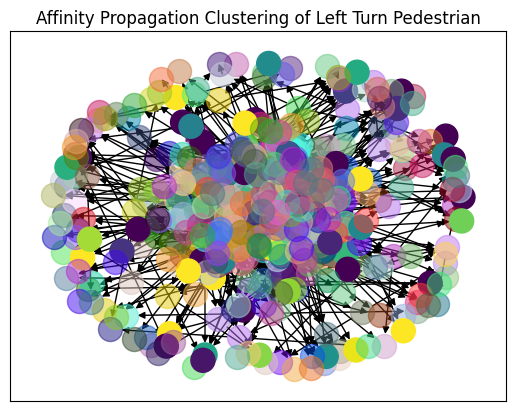

In [7]:
aff_labels, aff_num_in_clust = affin_prop_clust(G)

In [8]:
def mean_shift_clust(G):
    # Convert the MultiDiGraph to an adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()

    adj_matrix = adj_matrix.astype(np.float64)

    # Perform Mean Shift clustering
    mean_shift = MeanShift()
    mean_shift.fit(adj_matrix)

    # Get the cluster labels
    labels = mean_shift.labels_

    # Visualize the results
    pos = nx.spring_layout(G)  # positions for all nodes

    plt.figure()

    # Use a colormap that supports many unique colors
    colors = [(np.random.uniform(),np.random.uniform(),np.random.uniform(), 0.5) for i in range(max(labels)+1)]

    # Draw the nodes with colors based on their cluster
    unique_labels = np.unique(labels)
    num_in_clust = []
    for label in unique_labels:
        nodes = [n for n in G.nodes if labels[n] == label]
        num_in_clust.append(len(nodes))
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[label], label=f'Cluster {label}')

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrows=True)

    # plt.legend()
    plt.title('Mean Shift Clustering of Left Turn Pedestrian')
    plt.show()
    
    return labels, num_in_clust

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


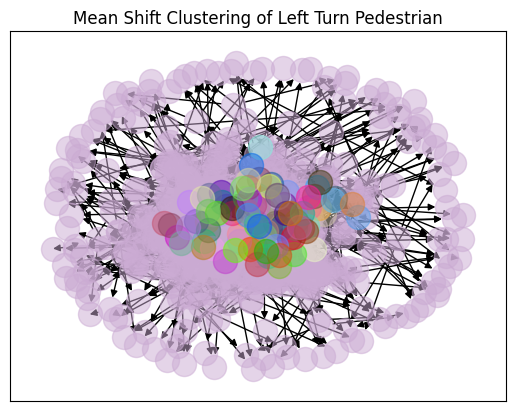

In [9]:
mean_labels, mean_num_in_clust = mean_shift_clust(G)

In [16]:
def spect_clust(G, k):
    '''
    Input: 
        - G: networkx MultiDiGraph
        - k: number of clusters
    Return:
        - labels of each node's cluster
        - number of nodes in each cluster
    '''

    # Convert the MultiDiGraph to an adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()

    # Perform k-means clustering
    spectral_clustering = SpectralClustering(n_clusters=k, affinity='precomputed', random_state=42)
    
    # Get the cluster labels
    labels = spectral_clustering.fit_predict(adj_matrix)

    # Visualize the results
    pos = nx.spring_layout(G)  # positions for all nodes

    plt.figure(figsize=(8, 6))

    colors = [(np.random.uniform(),np.random.uniform(),np.random.uniform(), 0.5) for i in range(max(labels)+1)]

    # Draw the nodes with colors based on their cluster
    num_in_clust = [0] * k
    for i in range(k):
        nodes = [n for n in G.nodes if labels[n] == i]
        num_in_clust[i] = len(nodes)
        # nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=plt.cm.tab10(i), label=f'Cluster {i}')
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[i], label=f'Cluster {i}')

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrows=True)

    # plt.legend()
    plt.title(f'Spectral Clustering of Left Turn Pedestrian with {k} Clusters')
    plt.show()

    return labels, num_in_clust

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


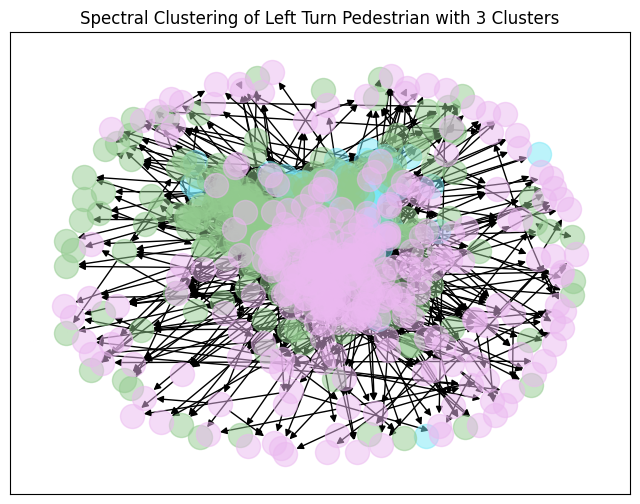

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


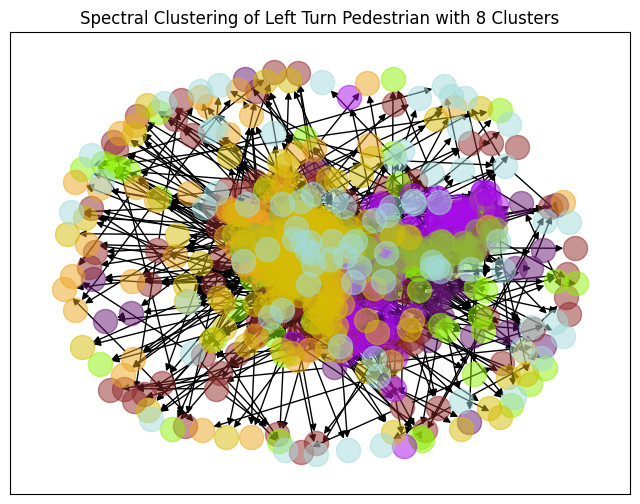

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


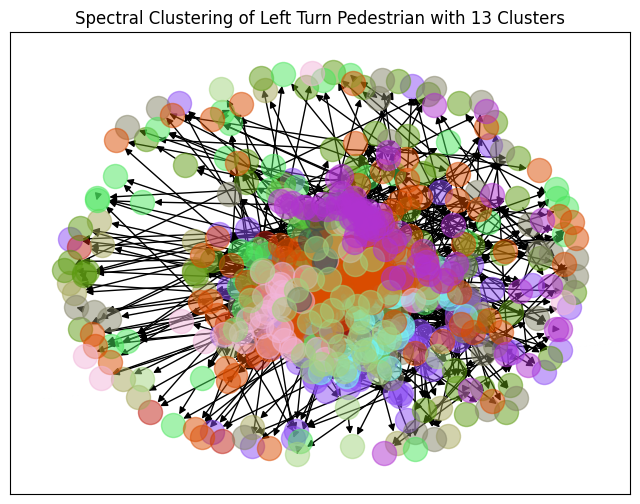

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


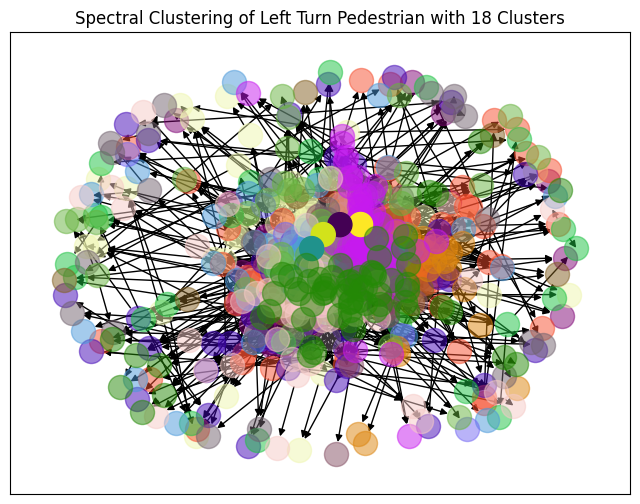

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


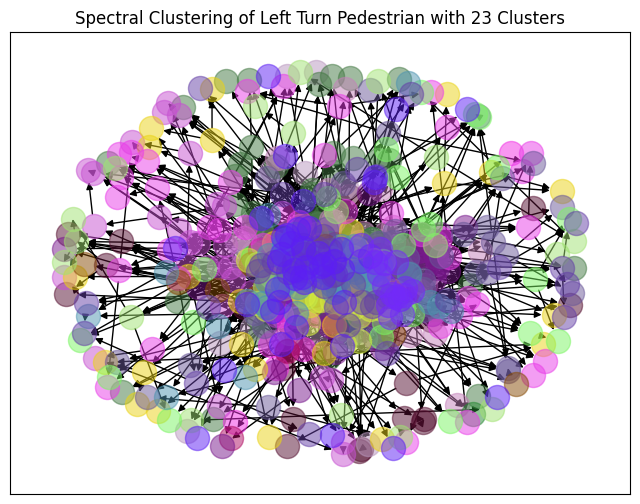

In [17]:
spect_labels = []
spect_num_in_clusts = []
for k in range(3, 25, 5):
    lab, num = spect_clust(G, k)
    spect_labels.append(lab)
    spect_num_in_clusts.append(num)

In [10]:
adj_matrix = nx.adjacency_matrix(G).todense()
for i in range(len(adj_matrix)):
    print(adj_matrix[i, i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
from visualization import graph_builder as gb
h0 = gb._game_format_nx(g0, attributes)
pd0 = nx.drawing.nx_pydot.to_pydot(h0)
pd0.write_pdf(path + 'game.pdf')